# *CardioCare*

### Heart Disease Risk Predictor

![Cover Image of Heart Care](cover_image.jpg)

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[Kaggle link for the dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Attribute Information
* Age: age of the patient [years]  
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

In [3]:
df.shape

(918, 12)

In [4]:
df.isnull().sum() #No missing values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Univariate Analysis and Bivariate Analysis

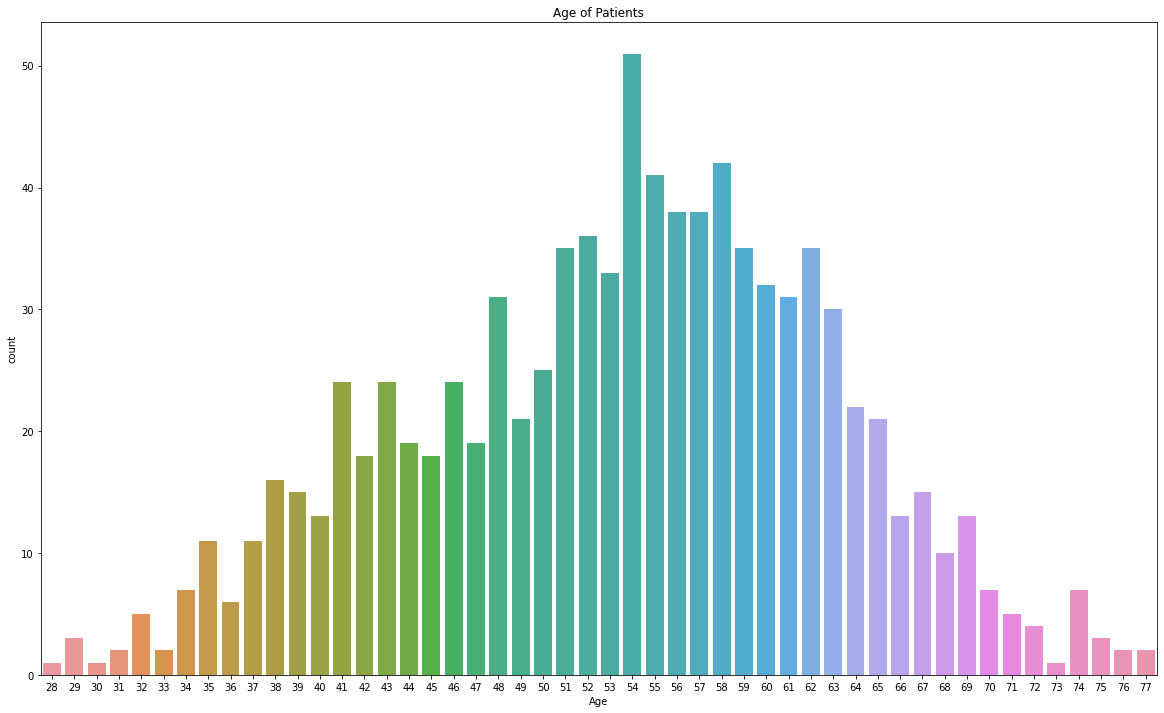

In [5]:
# Age attribute

plt.figure(figsize=(20,12))
plt.title('Age of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
sns.countplot(x='Age', data=df)
plt.show()

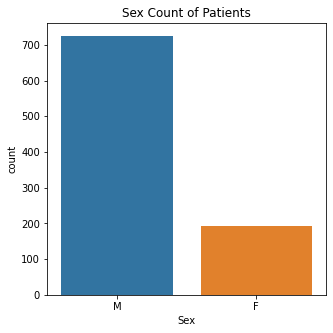

In [6]:
# Sex attribute

plt.figure(figsize=(5,5))
plt.title('Sex Count of Patients')
plt.xlabel('sex')
plt.ylabel('count')
sns.countplot(x='Sex',data=df)
plt.show()

In [7]:
# Chest Pain Attribute
cp_data = df['ChestPainType'].value_counts().reset_index()
cp_data['index'][3] = 'Typical Angina'
cp_data['index'][2] = 'Atypical Angina'
cp_data['index'][1] = 'Non-Anginal Pain'
cp_data['index'][0] = 'Asymptomatic'

cp_data

,index,ChestPainType
0,Asymptomatic,496
1,Non-Anginal Pain,203
2,Atypical Angina,173
3,Typical Angina,46


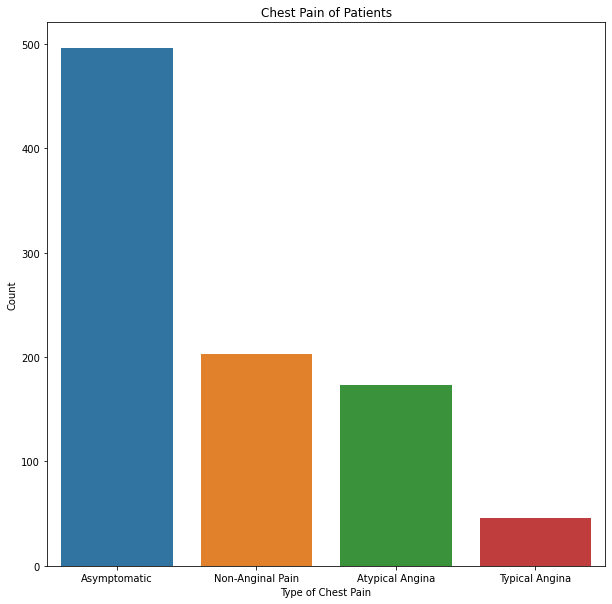

In [8]:
# bar plot to view the types of ChestPain

plt.figure(figsize=(10,10))
plt.title('Chest Pain of Patients')
sns.barplot(x='index', y='ChestPainType', data=cp_data)
plt.xlabel('Type of Chest Pain')
plt.ylabel('Count')
plt.show()

In [9]:
# Resting ECG attribute

ecg_data = df['RestingECG'].value_counts().reset_index()
ecg_data['index'][1] = 'Normal'
ecg_data['index'][0] = 'ST-T Wave Abnormal'
ecg_data['index'][2] = 'Probable or Definite Left Ventricular Hypertrophy by Estes'

ecg_data


,index,RestingECG
0,ST-T Wave Abnormal,552
1,Normal,188
2,Probable or Definite Left Ventricular Hypertro...,178


In [10]:
df['HeartDisease'].value_counts() # 1 = Heart Disease, 0 = Normal

1    508
0    410
Name: HeartDisease, dtype: int64

### For Continuous Variables

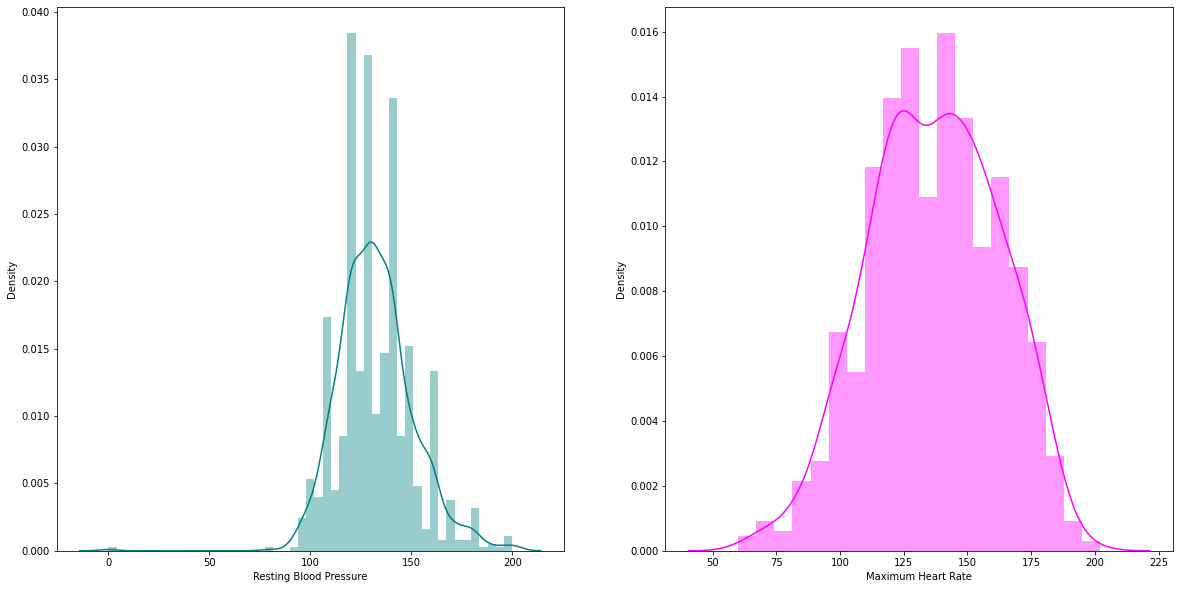

In [11]:
# Resting Blood Pressure & Maximum Heart Rate

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(df['RestingBP'], kde=True, color='teal')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Density')

plt.subplot(1,2,2)
sns.distplot(df['MaxHR'], kde=True, color='magenta')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Density')

plt.show()

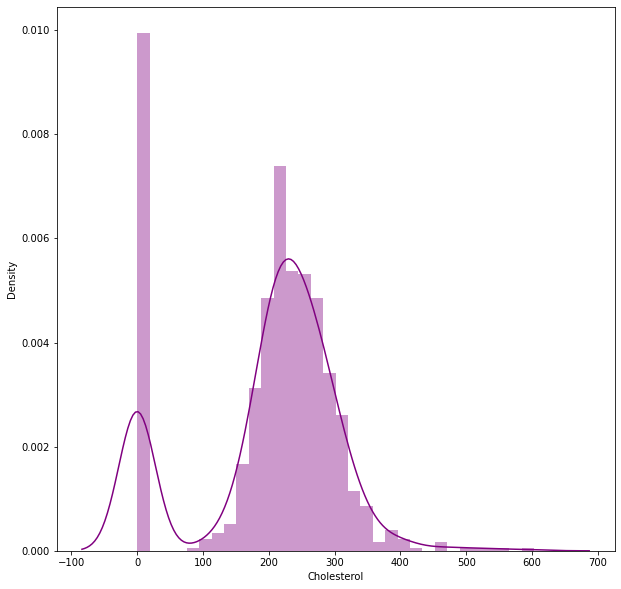

In [12]:
# Cholesterol 

plt.figure(figsize=(10,10))

sns.distplot(df['Cholesterol'], kde=True, color='purple')
plt.xlabel('Cholesterol')
plt.ylabel('Density')

plt.show()


In [15]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,0.479270,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,0.298507,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,0.469320,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,0.354892,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,0.323383,0,Normal,122,N,0.0,Up,0


In [16]:
from sklearn.preprocessing import LabelEncoder # Label Encoder for categorical data

le = LabelEncoder()

df['ChestPainType'] = le.fit_transform(df['ChestPainType'])

df['RestingECG'] = le.fit_transform(df['RestingECG'])

df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])

df['Sex'] = le.fit_transform(df['Sex'])

df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

### Feature Scaling

In [17]:
# Standard Scaler to scale the data (mean = 0 & std dev = 1) for model building

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df)

StandardScaler()

In [18]:
df = scale.transform(df)

In [19]:
df = pd.DataFrame(df,columns = ['Age','Sex','ChestPainType','RestingBP','Cholestrol', 'FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease'])

In [20]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholestrol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114,-1.113115
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078,0.898380
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114,-1.113115
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078,0.898380
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114,-1.113115


### Correlation Between The Variables

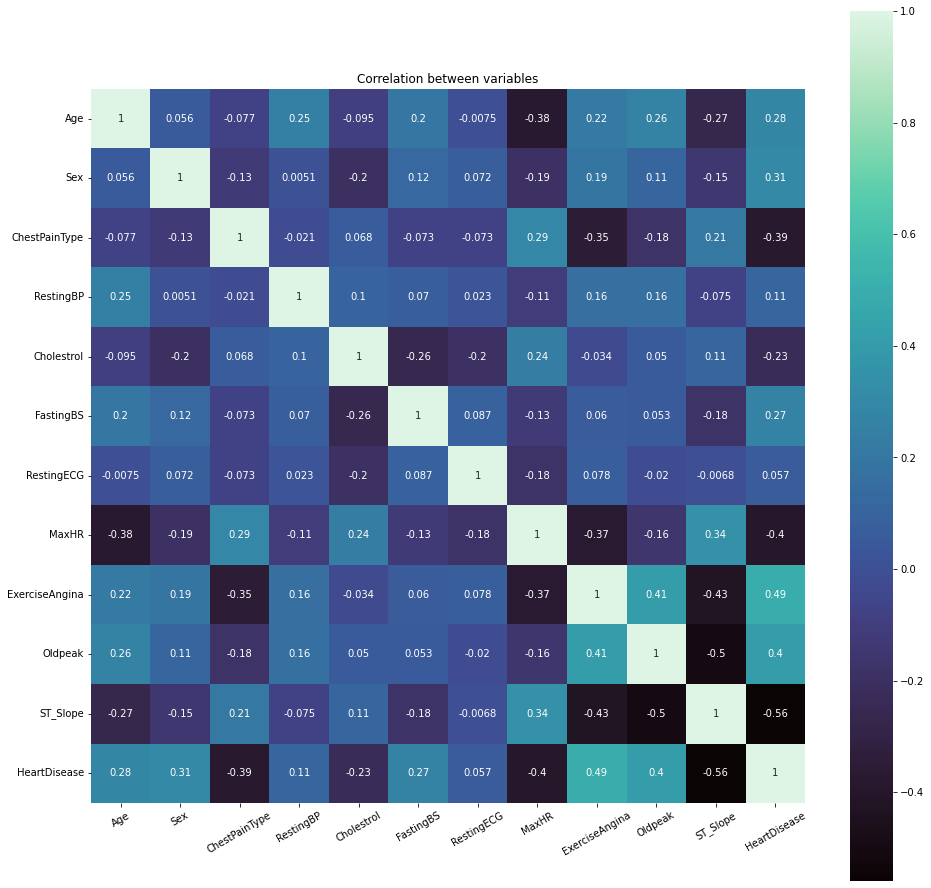

In [21]:
# Heatmap to check for correlation between the variables
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, square=True, cmap='mako')
plt.xticks(rotation=30)
plt.title('Correlation between variables')
plt.show()

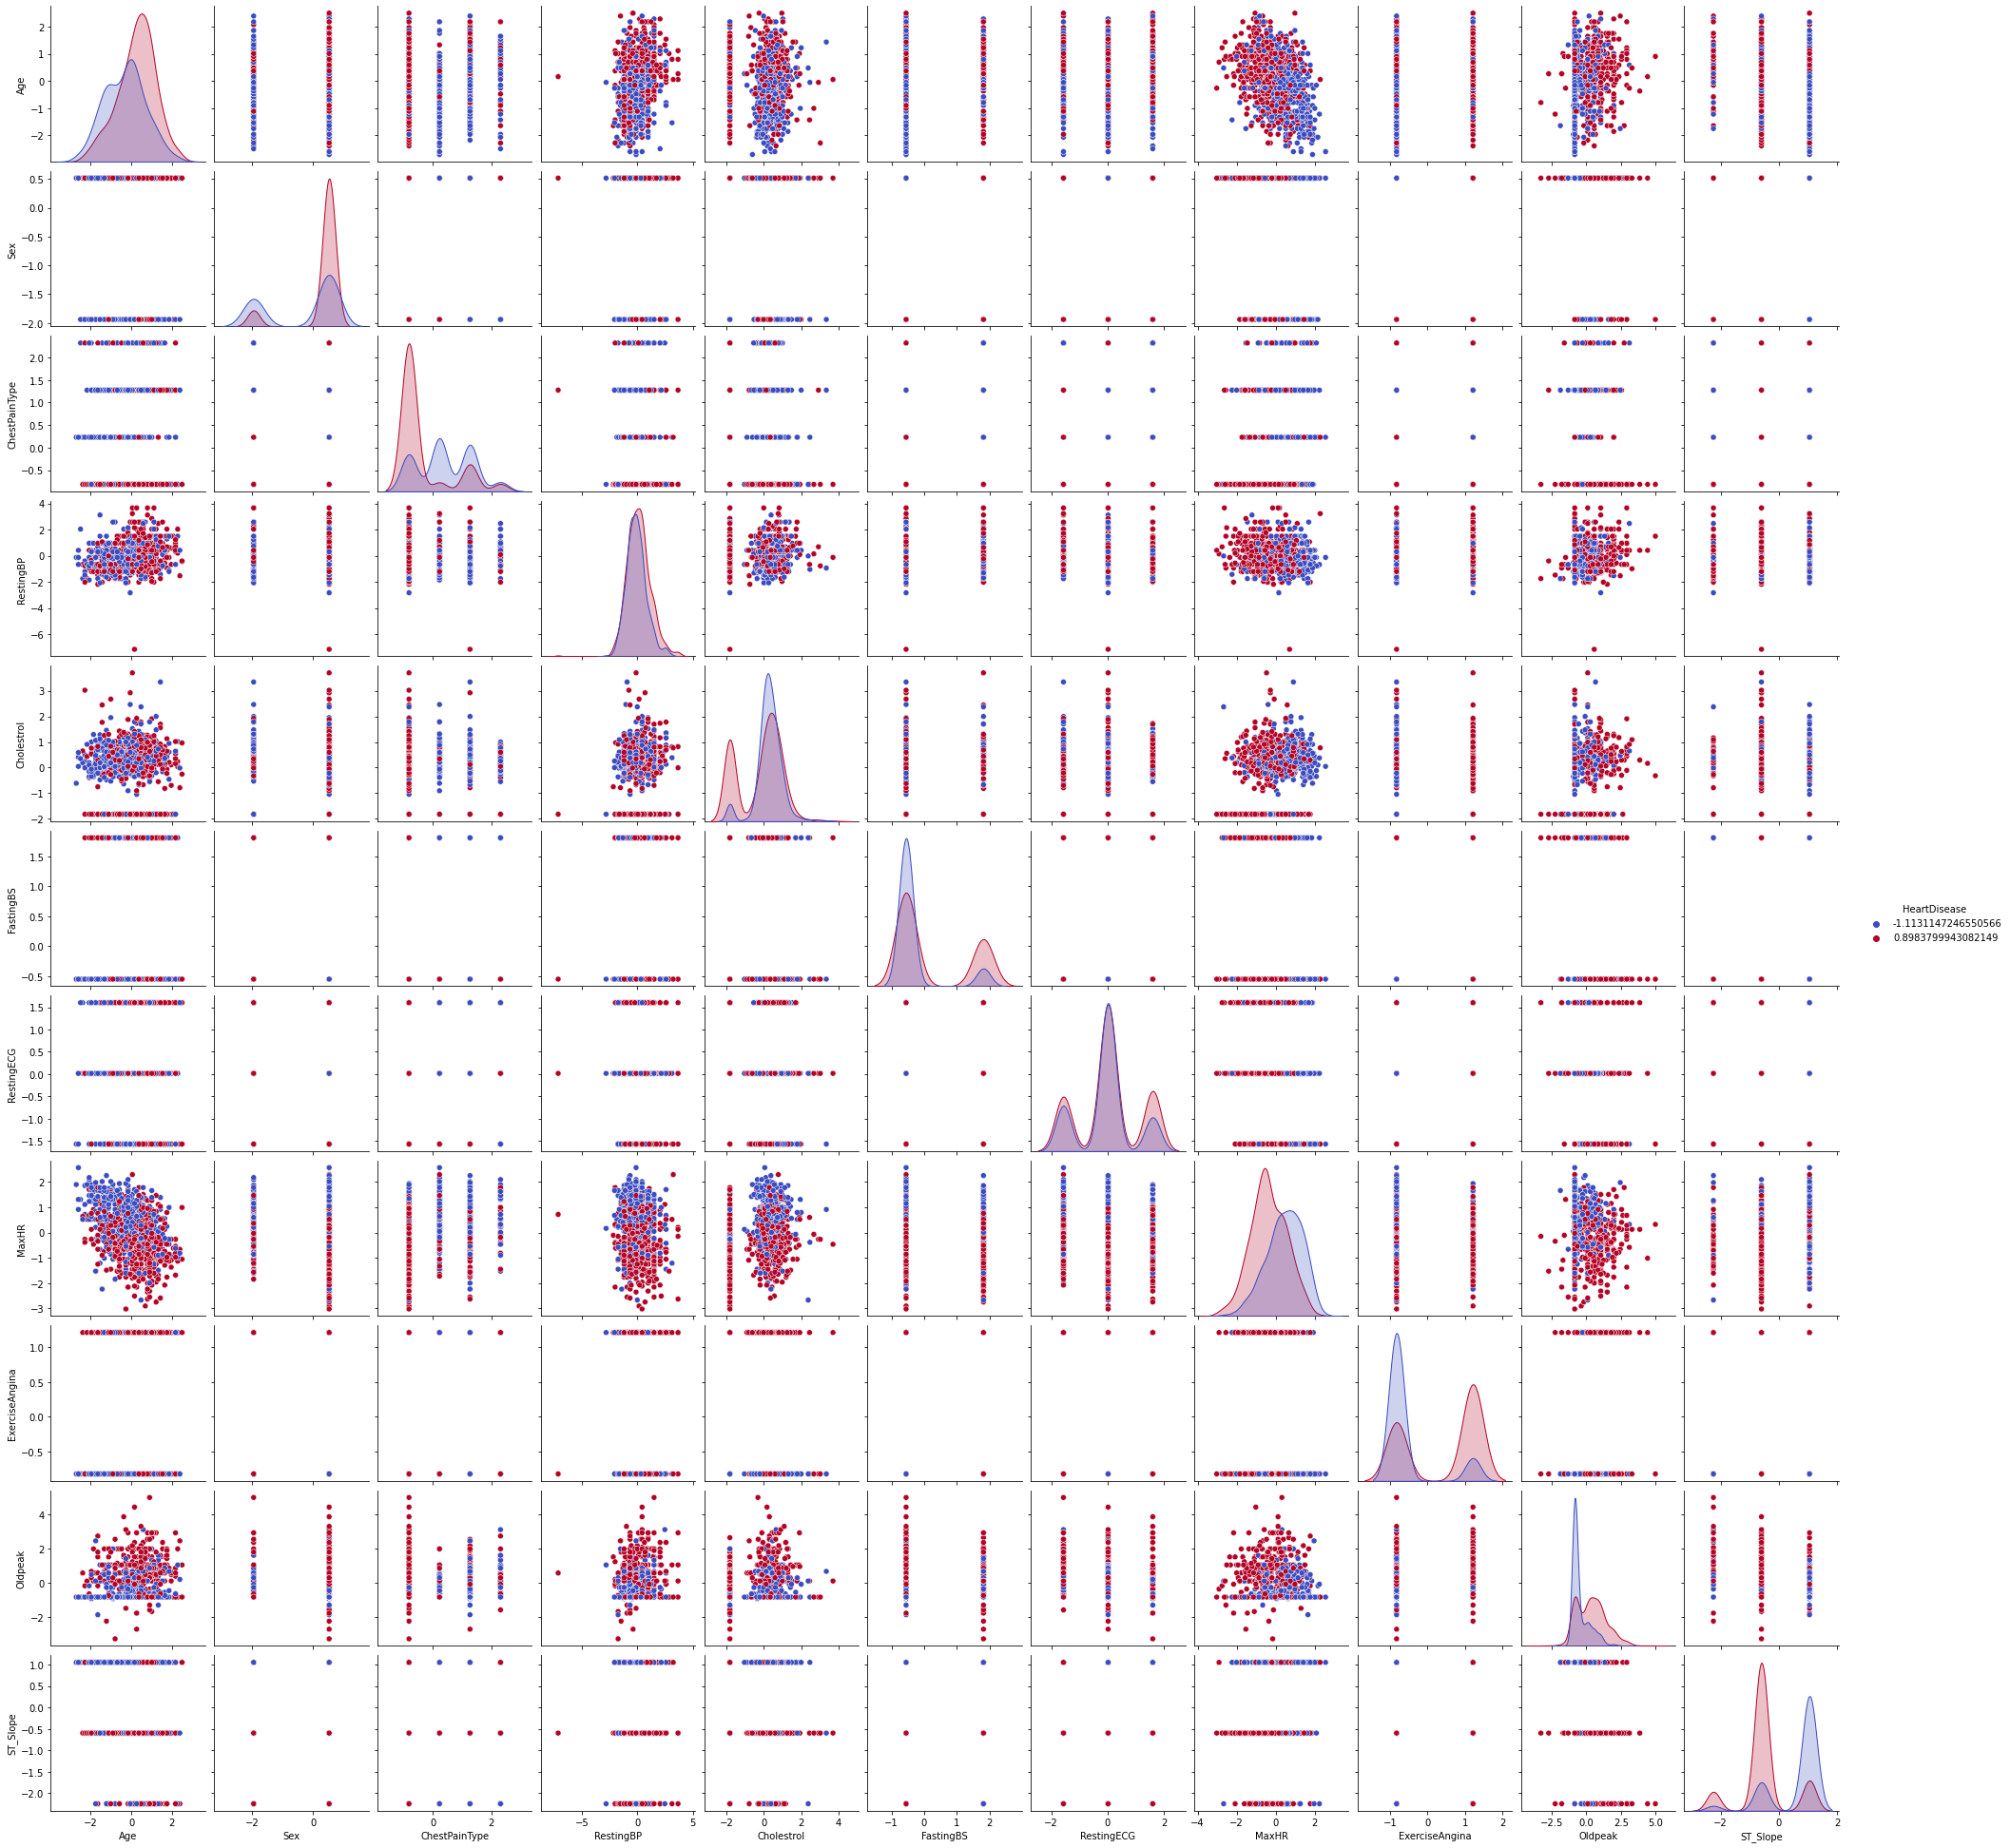

In [22]:
# Pairplot to check the correlation between the variables

sns.pairplot(data=df, hue='HeartDisease', palette='coolwarm')
# 1 = Heart Disease, 0 = Normal

### *Note - All the attributes are contribute to the model*

## Model Building

In [23]:
# Splitting the data

x = df.iloc[:,:-1]
x

,Age,Sex,ChestPainType,RestingBP,Cholestrol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,2.321086,-1.210356,0.596393,-0.551341,0.017255,-0.188999,-0.823556,0.293283,-0.596078
914,1.536902,0.515952,-0.816995,0.627078,-0.053049,1.813758,0.017255,0.164684,-0.823556,2.357094,-0.596078
915,0.370100,0.515952,-0.816995,-0.129513,-0.620168,-0.551341,0.017255,-0.857069,1.214246,0.293283,-0.596078
916,0.370100,-1.938163,0.229032,-0.129513,0.340275,-0.551341,-1.566710,1.461525,-0.823556,-0.832432,-0.596078


In [24]:
y = df.iloc[:,-1:]
y

,HeartDisease
0,-1.113115
1,0.898380
2,-1.113115
3,0.898380
4,-1.113115
...,...
913,0.898380
914,0.898380
915,0.898380
916,0.898380


In [25]:
from sklearn.model_selection import train_test_split

# Train = 0.7 and Test = 0.3
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
encoded_y = le.fit_transform(y_train)
model1 = LogisticRegression()

In [27]:
model1.fit(X_train, encoded_y)

LogisticRegression()

In [28]:
y_pred1 = model1.predict(X_test)
encoded_y_test = le.fit_transform(y_test)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [30]:
lr_conf_matrix = confusion_matrix(encoded_y_test,y_pred1)
lr_accuracy_score = accuracy_score(encoded_y_test,y_pred1)

In [31]:
lr_conf_matrix

array([[100,  12],
       [ 22, 142]], dtype=int64)

In [32]:
print(f"{lr_accuracy_score*100}%") # Accuracy of the model

87.68115942028986%


### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()


In [34]:
model2.fit(X_train,encoded_y)

DecisionTreeClassifier()

In [35]:
y_pred2 = model2.predict(X_test)

In [36]:
encoded_y_test = le.fit_transform(y_test)

In [37]:
model2_conf_matrix = confusion_matrix(encoded_y_test,y_pred2)
model2_accuracy_score = accuracy_score(encoded_y_test,y_pred2)

In [38]:
model2_conf_matrix

array([[ 90,  22],
       [ 46, 118]], dtype=int64)

In [39]:
print(f"{model2_accuracy_score*100}%") # Accuracy of the model

75.36231884057972%


### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()

In [41]:
model3.fit(X_train,encoded_y)

RandomForestClassifier()

In [42]:
y_pred3 = model3.predict(X_test)

In [43]:
model3_conf_matrix = confusion_matrix(encoded_y_test,y_pred3)
model3_accuracy_score = accuracy_score(encoded_y_test,y_pred3)

In [44]:
model3_conf_matrix

array([[ 98,  14],
       [ 20, 144]], dtype=int64)

In [45]:
print(f"{model3_accuracy_score*100}%") # Accuracy of the model

87.68115942028986%


### K-Nearest Neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# Function for error calculation

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,encoded_y)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != encoded_y_test))

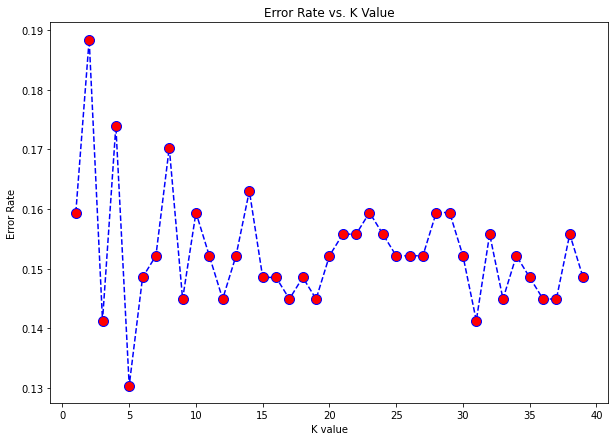

In [47]:
plt.figure(figsize=(10,7))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.show()

As we can see from the graph we should take K=5 as it gives the best error rate.

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,encoded_y)
y_pred4 = knn.predict(X_test)

In [49]:
knn_conf_matrix = confusion_matrix(encoded_y_test,y_pred4)
knn_accuracy_score = accuracy_score(encoded_y_test,y_pred4)

In [50]:
knn_conf_matrix

array([[ 98,  14],
       [ 22, 142]], dtype=int64)

In [51]:
print(f"{knn_accuracy_score*100}%") # Accuracy of the model

86.95652173913044%


### Support Vector Machine (SVM)

In [52]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,encoded_y)
y_pred5 = svc.predict(X_test)

In [53]:
svc_conf_matrix = confusion_matrix(encoded_y_test,y_pred5)
svc_accuracy_score = accuracy_score(encoded_y_test,y_pred5)

In [54]:
svc_conf_matrix

array([[ 98,  14],
       [ 17, 147]], dtype=int64)

In [55]:
print(f"{svc_accuracy_score*100}%") # Accuracy of the model

88.76811594202898%


### Compiling all the results

In [56]:
models_acc = pd.DataFrame({'Model' : ['Logistic Regression','Decision Tree','Random Forest','KNN','SVM'], 'Accuracy' : [lr_accuracy_score*100, model2_accuracy_score*100, model3_accuracy_score*100, knn_accuracy_score*100, svc_accuracy_score*100]}) # creating a dataframe

In [57]:
models_acc = models_acc.sort_values(by='Accuracy', ascending=False)
models_acc

,Model,Accuracy
4,SVM,88.768116
0,Logistic Regression,87.681159
2,Random Forest,87.681159
3,KNN,86.956522
1,Decision Tree,75.362319


### Adaboost Classifier

In [58]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(base_estimator=svc, n_estimators=100, learning_rate=0.01, random_state=0, algorithm='SAMME')

In [59]:
adaboost.fit(X_train,encoded_y)

AdaBoostClassifier(algorithm='SAMME', base_estimator=SVC(), learning_rate=0.01,
                   n_estimators=100, random_state=0)

In [60]:
y_pred6 = adaboost.predict(X_test)

In [61]:
adaboost_conf_matrix = confusion_matrix(encoded_y_test,y_pred6)
adaboost_acc_score = accuracy_score(encoded_y_test,y_pred6)

In [62]:
adaboost_conf_matrix

array([[  0, 112],
       [  0, 164]], dtype=int64)

In [63]:
print(f"{adaboost_acc_score*100}%") # Accuracy of the model (Very low)

59.42028985507246%


### Using Grid Search CV for HyperParameter tuning (top 3 performing algorithms)

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
models_acc 

,Model,Accuracy
4,SVM,88.768116
0,Logistic Regression,87.681159
2,Random Forest,87.681159
3,KNN,86.956522
1,Decision Tree,75.362319


In [65]:
# Convert to int64
X_train = X_train.astype('int64')
y_train = y_train.astype('int64')
X_test = X_test.astype('int64')
y_test = y_test.astype('int64')

### For Support Vector Classifier (SVC)

In [66]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, encoded_y)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.760 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.695 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.820 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.828 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.805 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.705 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [67]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(encoded_y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       112
           1       0.93      0.87      0.90       164

    accuracy                           0.89       276
   macro avg       0.88      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



In [68]:
SVC_conf_matrix = confusion_matrix(encoded_y_test,grid_predictions)
SVC_conf_matrix

array([[102,  10],
       [ 21, 143]], dtype=int64)

In [69]:

svc_accuracy_score_hyper = accuracy_score(encoded_y_test,grid_predictions)

print(f"{svc_accuracy_score_hyper*100}%")

88.76811594202898%


### For Logistic Regression

In [70]:
# defining parameter range

param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['none','l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
}

grid1 = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)

grid1.fit(X_train, encoded_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END C=100, penalty=none, solver=newton-cg;, score=0.845 total time=   0.0s
[CV 2/5] END C=100, penalty=none, solver=newton-cg;, score=0.845 total time=   0.0s
[CV 3/5] END C=100, penalty=none, solver=newton-cg;, score=0.820 total time=   0.0s
[CV 4/5] END C=100, penalty=none, solver=newton-cg;, score=0.836 total time=   0.0s
[CV 5/5] END C=100, penalty=none, solver=newton-cg;, score=0.820 total time=   0.0s
[CV 1/5] END .C=100, penalty=none, solver=lbfgs;, score=0.845 total time=   0.0s
[CV 2/5] END .C=100, penalty=none, solver=lbfgs;, score=0.845 total time=   0.0s
[CV 3/5] END .C=100, penalty=none, solver=lbfgs;, score=0.820 total time=   0.0s
[CV 4/5] END .C=100, penalty=none, solver=lbfgs;, score=0.836 total time=   0.0s
[CV 5/5] END .C=100, penalty=none, solver=lbfgs;, score=0.820 total time=   0.0s
[CV 1/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, penalty=no

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [71]:
# print best parameter after tuning
print(grid1.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid1.best_estimator_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=0.1, solver='newton-cg')


In [72]:
grid_predictions1 = grid1.predict(X_test)

# print classification report
print(classification_report(encoded_y_test, grid_predictions1))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       112
           1       0.90      0.84      0.87       164

    accuracy                           0.85       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.85      0.85       276



In [73]:
log_conf_matrix = confusion_matrix(encoded_y_test,grid_predictions1)
log_conf_matrix

array([[ 97,  15],
       [ 27, 137]], dtype=int64)

In [74]:
lr_accuracy_score_hyper = accuracy_score(encoded_y_test,grid_predictions1)
print(f"{lr_accuracy_score_hyper*100}%")

84.78260869565217%


### For Random Forest Classifier

In [75]:
# defining parameter range
param_grid ={ 'bootstrap' : [True],
            'max_depth' : [3, None],
            'max_features' : ['auto', 'sqrt'],
            'min_samples_leaf' : [1, 2, 4], 
            'min_samples_split' : [2, 5, 10],
            'n_estimators' : [5,20,50,100]
}

grid2 = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)

grid2.fit(X_train, encoded_y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.822 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.822 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.875 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.812 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.805 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.853 total time=   0.0s
[CV 2/5] END bootstrap=True, max_dep

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [3, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 20, 50, 100]},
             verbose=3)

In [76]:
# print best parameter after tuning
print(grid2.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid2.best_estimator_)

{'bootstrap': True, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
RandomForestClassifier(max_depth=3, max_features='sqrt', n_estimators=50)


In [77]:
grid2_predictions = grid2.predict(X_test)

# print classification report
print(classification_report(encoded_y_test, grid2_predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       112
           1       0.90      0.91      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



### Final Model and Predictions

In [78]:
rbf_conf_matrix = confusion_matrix(encoded_y_test,grid2_predictions)
rbf_conf_matrix


array([[ 95,  17],
       [ 15, 149]], dtype=int64)

In [79]:
rbf_accuracy_score_hyper = accuracy_score(encoded_y_test,grid2_predictions)
print(f"{rbf_accuracy_score_hyper*100}%")

88.40579710144928%


In [82]:
# Adding the new features to the dataframe

models_acc = models_acc.append({'Model' : 'Logistic Regression_hyper', 'Accuracy' : lr_accuracy_score_hyper*100}, ignore_index=True)
models_acc = models_acc.append({'Model' : 'SVM_hyper', 'Accuracy' : svc_accuracy_score_hyper*100}, ignore_index=True)
models_acc = models_acc.append({'Model' : 'Random Forest_hyper', 'Accuracy' : rbf_accuracy_score_hyper*100}, ignore_index=True)

# Sorting the dataframe by accuracy
models_acc = models_acc.sort_values(by='Accuracy', ascending=False)

models_acc

,Model,Accuracy
0,SVM,88.768116
1,SVM_hyper,88.768116
9,SVM_hyper,88.768116
2,Random Forest_hyper,88.405797
10,Random Forest_hyper,88.405797
3,Logistic Regression,87.681159
4,Random Forest,87.681159
5,KNN,86.956522
6,Logistic Regression_hyper,84.782609
8,Logistic Regression_hyper,84.782609


### Conclusion : Support Vector Classifier (without hyperparameter tuning) is the best model to predict the heart disease risk for the above data